In [1]:
import numpy as np
from matplotlib import pyplot as plt
from manim import *

In [181]:
def func(x: np.ndarray):
    freq1 = 2
    freq2 = 3
    return np.cos(2*np.pi * freq1 * x) + np.sin(2*np.pi * freq2 * x)

def freq_calc(x: np.ndarray, frecuencia: int):
    y = np.exp(2*np.pi * 1j * x * frecuencia)
    return y.real, y.imag

def euler(x: np.ndarray):
    y = np.exp(x * 1j)
    return y.real, y.imag


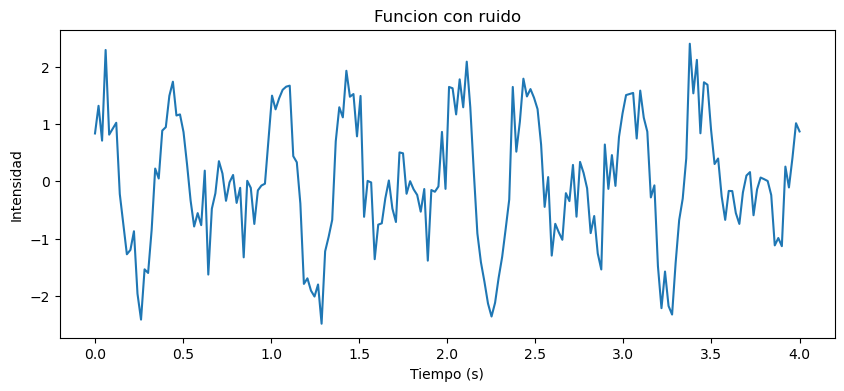

In [182]:
n = 200
time = 4
np.random.seed(2)
X = np.linspace(0, time, n)
Y_real = func(X)
Y = Y_real + 0.4 * np.random.normal(0, 1, n)

X_euler, Y_euler = euler(X)

_, ax = plt.subplots(1,1, figsize=(10, 4))
ax.plot(X, Y);
ax.set_ylabel("Intensidad")
ax.set_xlabel("Tiempo (s)")
ax.set_title("Funcion con ruido");

In [183]:
fft = np.fft.rfft(Y) / n
freq = np.fft.rfftfreq(n, X[1] - X[0])

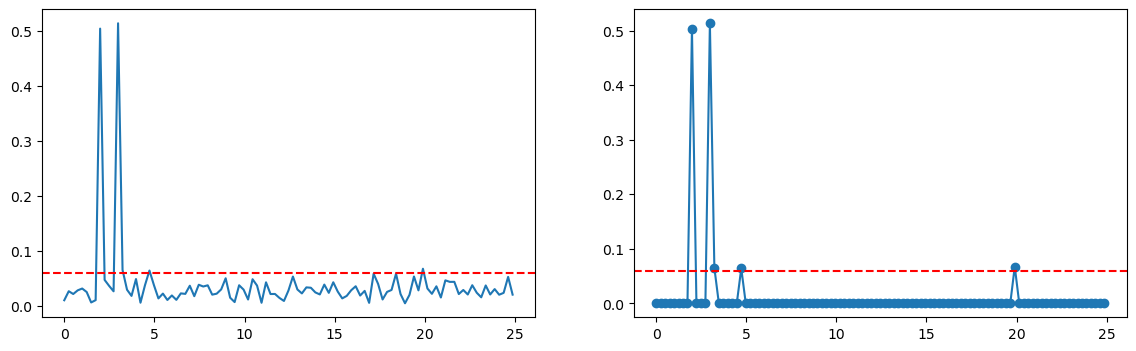

In [184]:
umbral = 0.06
fft_filtrado = fft * (np.abs(fft) > umbral)

_, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(freq, np.abs(fft));
ax[0].axhline(umbral, color="red", linestyle="--");

ax[1].scatter(freq, np.abs(fft_filtrado));
ax[1].plot(freq, np.abs(fft_filtrado));
ax[1].axhline(umbral, color="red", linestyle="--");

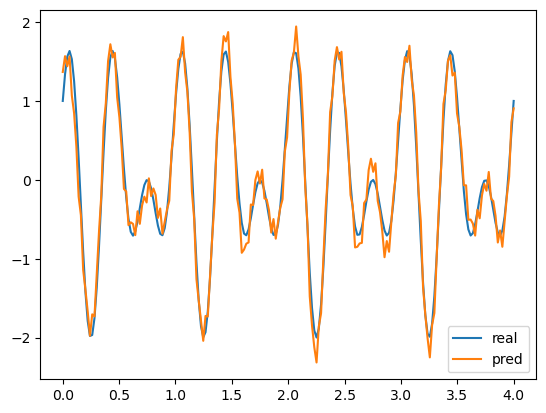

In [185]:
funciones = []
for f, c in zip(freq, fft_filtrado):
    a = 2 * c.real
    b = -2 * c.imag

    comp = a * np.cos(2*np.pi * f * X) + b * np.sin(2*np.pi * f * X)
    funciones.append(comp)

Y_PRED = np.sum(funciones, axis=0)

plt.plot(X, Y_real, label="real")
plt.plot(X, Y_PRED, label="pred");
plt.legend();

8 Si compone
12 Si compone
13 
19 
80 


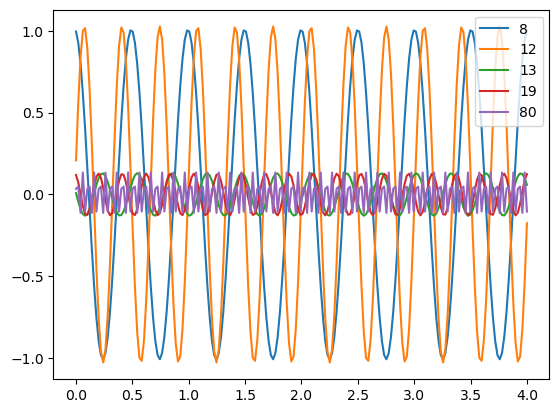

In [187]:
funciones_elegidas = []
for i, f in enumerate(funciones):
    if np.abs(fft_filtrado[i]) > 0.0:
        print(i, end=" ")
        funciones_elegidas.append(funciones[i])
        
        if np.abs(fft_filtrado[i]) > 0.3:
            print("Si compone")
        else:
            print("")
        plt.plot(X, f, label=f"{i}")

plt.legend();
# n func que si compone la funcion original

In [188]:
%%manim -pql -v WARNING Descomposicion

class Descomposicion(Scene):
    def construct(self):
        self.show_axis()
        self.wait()
        self.wait()
        self.animate()
        self.wait()
    
    def show_axis(self):
        self.ax = Axes(
            x_range=[0, time, 1],
            y_range=[-2, 2, 1],
            tips=False
        )
        self.play(Create(self.ax))
        
        self.graph = self.ax.plot_line_graph(X, Y, add_vertex_dots=False)
        self.play(Write(self.graph))
        
        self.play(
            self.ax.animate.move_to(LEFT*4).scale(0.4),
            self.graph.animate.move_to(LEFT*4).scale(0.4)
        )
    
    def animate(self):
        grupo = Group()
        g1 = self.ax.plot_line_graph(X, funciones_elegidas[0], add_vertex_dots=False)
        g1.color = RED
        self.play(g1.animate.move_to(RIGHT * 2 + UP * 3))
        grupo.add(g1)
        
        g2 = self.ax.plot_line_graph(X, funciones_elegidas[1], add_vertex_dots=False)
        g2.color = BLUE
        self.play(g2.animate.move_to(RIGHT * 2 + UP * 1.5))
        grupo.add(g2)
        
        g3 = self.ax.plot_line_graph(X, funciones_elegidas[2], add_vertex_dots=False)
        g3.color = GREEN
        self.play(g3.animate.move_to(RIGHT * 2))
        grupo.add(g3)
        
        g4 = self.ax.plot_line_graph(X, funciones_elegidas[3], add_vertex_dots=False)
        g4.color = PURPLE
        self.play(g4.animate.move_to(RIGHT * 2 + DOWN * 1.5))
        grupo.add(g4)
        
        g5 = self.ax.plot_line_graph(X, funciones_elegidas[4], add_vertex_dots=False)
        g5.color = ORANGE
        self.play(g5.animate.move_to(RIGHT * 2 + DOWN * 3))
        grupo.add(g5)
        
        self.wait()
        self.play(FadeOut(self.ax), FadeOut(self.graph), grupo.animate.move_to(LEFT * 4))
        self.wait()
        
        graph = self.ax.plot_line_graph(X, Y_PRED, add_vertex_dots=False)
        graph.move_to(RIGHT*4)
        self.play(FadeIn(graph), Transform(grupo, graph))
        self.play(graph.animate.move_to(RIGHT + LEFT))

Manim Community v0.19.0

## Vector rotando a partir de seno y coseno

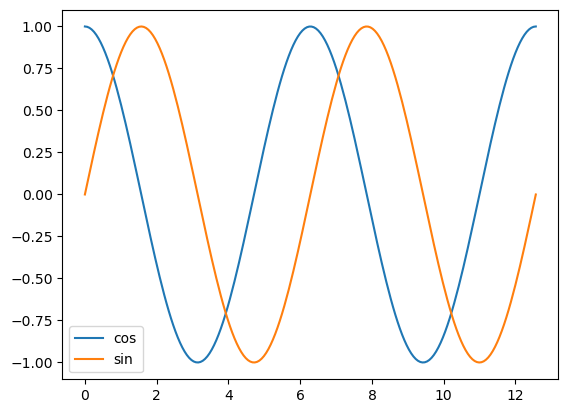

In [190]:
X = np.linspace(0, 4*np.pi, n)

plt.plot(X, np.cos(X), label="cos")
plt.plot(X, np.sin(X), label="sin")
plt.legend();

In [189]:
%%manim -pql -v WARNING VectorRotando

class VectorRotando(Scene):
    def construct(self):
        #Aca empiezo a construir los ejes, los posiciono y escalo
        ax_cos = Axes(
            x_range=[0, 4*PI, PI],
            y_range=[-1, 1, 1],
            tips=False
        )
        ax_cos.move_to(LEFT*4 + UP*2).scale(0.4)
        ax_cos_title = Text("Cos(t)").next_to(ax_cos, UP).scale(0.6)
        
        ax_sin = ax_cos.copy()
        ax_sin.move_to(LEFT*4 + DOWN*2)
        ax_sin_title = Text("Sin(t) * i").next_to(ax_sin, UP).scale(0.6)
        
        ax_grid = NumberPlane(
            x_range=[-1.5, 1.5, 1],
            y_range=[-1.5, 1.5, 1]
        )
        ax_grid.move_to(RIGHT*2)
        ax_grid_title = Text("Plano complejo").next_to(ax_grid, UP).scale(0.6)
        
        self.play(Create(ax_cos), Create(ax_sin), Write(ax_cos_title), Write(ax_sin_title), Create(ax_grid), Write(ax_grid_title))
        self.wait()
        
        # A partir de aca empiezo a graficar los puntos y las funciones
        # Esto maneja el grafico sin(x)
        t2 = ValueTracker(0)
        punto_sin = always_redraw(lambda: Dot(ax_sin.c2p(t2.get_value(), np.sin(t2.get_value())), color=RED))
        curva_sin = always_redraw(
            lambda: ax_sin.plot(
                lambda x: np.sin(x),
                x_range=[0, t2.get_value()],
                color=BLUE
            )
        )
        punto_grid_sin = always_redraw(lambda: Dot(ax_grid.c2p(0, np.sin(t2.get_value())), color=RED))
        self.play(FadeIn(punto_sin), FadeIn(punto_grid_sin))
        self.wait()
        
        self.play(Create(curva_sin),
                  UpdateFromAlphaFunc(punto_sin, lambda m, a: t2.set_value(4*PI*a)),
                  UpdateFromAlphaFunc(punto_grid_sin, lambda m, a: t2.set_value(4*PI*a)),
                  run_time=8, rate_func=linear)
        self.wait()
        self.play(FadeOut(punto_sin), FadeOut(punto_grid_sin))
        t1 = ValueTracker(0)
        
        # Esto maneja el grafico cos(x)
        punto_cos = always_redraw(lambda: Dot(ax_cos.c2p(t1.get_value(), np.cos(t1.get_value())), color=RED))
        curva_cos = always_redraw(
            lambda: ax_cos.plot(
                lambda x: np.cos(x),
                x_range=[0, t1.get_value()],
                color=BLUE
            )
        )
        
        punto_grid_cos = always_redraw(lambda: Dot(ax_grid.c2p(np.cos(t1.get_value()), 0), color=RED))
        
        self.play(FadeIn(punto_cos), FadeIn(punto_grid_cos))
        self.wait()
        self.play(Create(curva_cos),
                  UpdateFromAlphaFunc(punto_cos, lambda m, a: t1.set_value(4*PI*a)),
                  UpdateFromAlphaFunc(punto_grid_cos, lambda m, a: t1.set_value(4*PI*a)),
                  run_time=8, rate_func=linear)
        self.wait()
        self.play(FadeOut(punto_cos), FadeOut(punto_grid_cos))
        
        # Aca voy a manejar ambos al mismo tiempo
        t3 = ValueTracker(0)
        punto_grid = always_redraw(lambda: Dot(ax_grid.c2p(np.cos(t3.get_value()), np.sin(t3.get_value())), color=RED))
        self.play(FadeIn(punto_grid), FadeOut(curva_cos), FadeOut(curva_sin))
        self.wait()
        self.play(
            Create(curva_cos),
            UpdateFromAlphaFunc(punto_cos, lambda m, a: t1.set_value(4*PI*a)),
            
            Create(curva_sin),
            UpdateFromAlphaFunc(punto_sin, lambda m, a: t2.set_value(4*PI*a)),
            
            UpdateFromAlphaFunc(punto_grid, lambda m, a: t3.set_value(4*PI*a)),
            run_time=10, rate_func=linear
        )
        

Manim Community v0.19.0

## Funcion input y su producto con el vector rotando

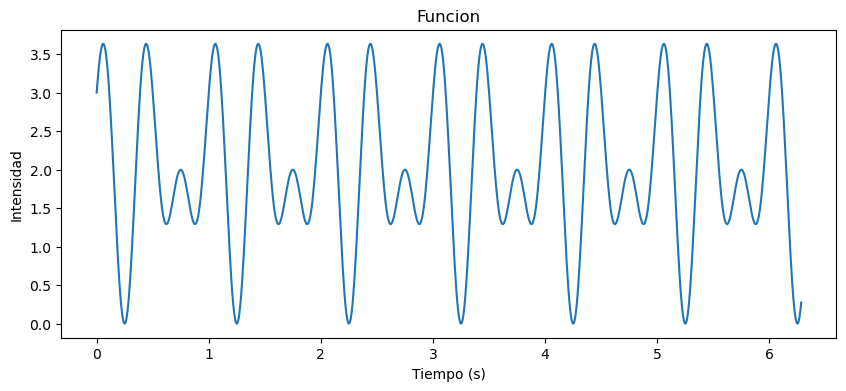

In [191]:
n = 800
time = 2*np.pi
np.random.seed(2)
X = np.linspace(0, time, n)
Y = func(X) + 2

X_euler, Y_euler = euler(X)

_, ax = plt.subplots(1,1, figsize=(10, 4))
ax.plot(X, Y);
ax.set_ylabel("Intensidad")
ax.set_xlabel("Tiempo (s)")
ax.set_title("Funcion");

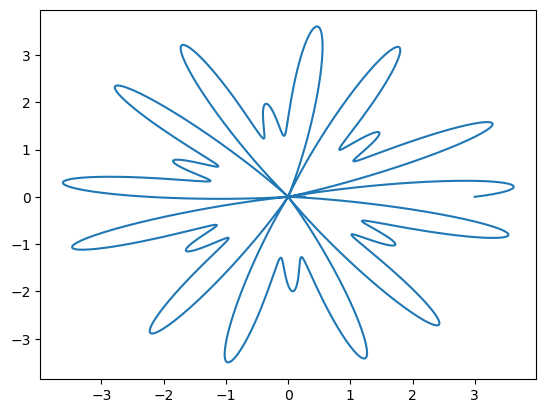

In [192]:
# plt.plot(X_euler, Y * Y_euler);
# plt.polar(X, Y)
plt.plot(X_euler * Y, Y_euler * Y);

In [193]:
%%manim -ql -v WARNING ProductoRotando

class ProductoRotando(Scene):
    def construct(self):
        # Aca creo los ejes y grillas
        ax = Axes(
            x_range=[0, 2*PI, 1],
            y_range=[0, 4, 1],
            tips=False
        )
        ax.scale(0.5).move_to(LEFT*3 + UP*1.6)
        
        grid_vector = NumberPlane(
            x_range=[-1.5, 1.5, 1],
            y_range=[-1.5 ,1.5, 1]
        )
        grid_vector.move_to(LEFT*3 + DOWN*1.5).scale(0.7)
        
        grid = NumberPlane(
            x_range=[-2, 2, 1],
            y_range=[-2 ,2, 1]
        )
        grid.move_to(RIGHT*3.5).scale(0.7)
        
        # Aca estan los titulos
        ax_title = MathTex(r"f(x)").next_to(ax, UP)
        grid_vector_title = MathTex(r"e^{i 2 \pi t}").next_to(grid_vector, LEFT)
        grid_title = MathTex(r"f(x) \cdot e^{i 2 \pi t}").next_to(grid, UP*4.5)
        
        self.play(Create(ax), Create(grid_vector), Create(grid),
                  Write(ax_title), Write(grid_vector_title), Write(grid_title))
        self.wait()
        
        # Aca grafico los datos
        graph = ax.plot_line_graph(X, Y, add_vertex_dots=False)
        
        t = ValueTracker(0)
        # Vector y trayectoria de grilla 1
        punto1 = always_redraw(
            lambda: Dot(
                grid_vector.c2p(
                    X_euler[int(t.get_value()) % n],
                    Y_euler[int(t.get_value()) % n]
                ),
                color=YELLOW
            )
        )
        vector1 = always_redraw(
            lambda: Arrow(
                start=grid_vector.c2p(0, 0),
                end=punto1.get_center(),
                buff=0,
                color=WHITE
            )
        )
        trayect1 = TracedPath(punto1.get_center, stroke_color=YELLOW, stroke_width=3)
        
        # Vector y trayectoria de grilla 2
        punto2 = always_redraw(
            lambda: Dot(
                grid.c2p(
                    X_euler[int(t.get_value()) % n] * Y[int(t.get_value()) % n],
                    Y_euler[int(t.get_value()) % n] * Y[int(t.get_value()) % n]
                ),
                color=YELLOW
            )
        )
        vector2 = always_redraw(
            lambda: Arrow(
                start=grid.c2p(0, 0),
                end=punto2.get_center(),
                buff=0,
                color=WHITE
            )
        )
        trayect2 = TracedPath(punto2.get_center, stroke_color=YELLOW, stroke_width=3)
        

        self.play(Create(vector1), FadeIn(punto1), Create(trayect1),
                  Create(vector2), FadeIn(punto2), Create(trayect2))

        # Animación: recorrer todos los puntos
        self.play(t.animate.set_value(len(X_euler)-1), Create(graph), run_time=15, rate_func=linear)
        self.wait()
        
        

Manim Community v0.19.0

## grafico "polar" a traves de la frecuencia de la funcion

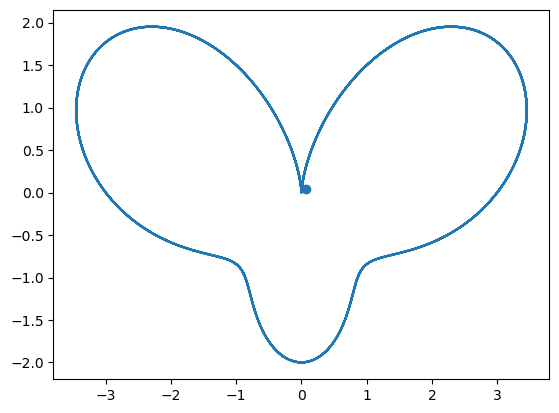

In [262]:
X_freq, Y_freq = freq_calc(X, 1)
plt.plot(X_freq * Y, Y_freq * Y);
plt.scatter(np.mean(X_freq * Y), np.mean(Y_freq * Y));

In [278]:
funciones = []
for f in range(1, 4):
    X_freqs, Y_freqs = freq_calc(X, f)
    funciones.append(np.array([X_freqs * Y, Y_freqs * Y]).T)

n_funciones = len(funciones)
np.shape(funciones)

(3, 800, 2)

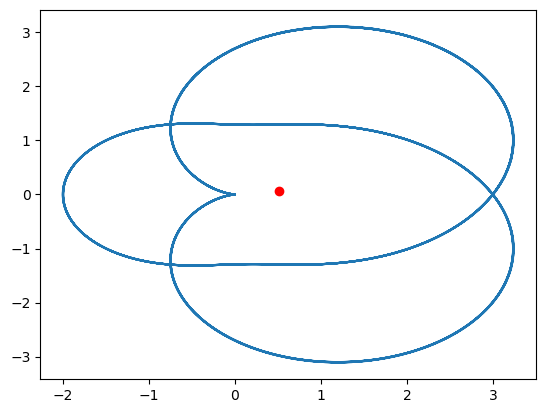

In [281]:
plt.plot(funciones[1][:,0], funciones[1][:,1]);
plt.scatter(funciones[1][:,0].mean(), funciones[1][:,1].mean(), color="red");

In [ ]:

class GraficarFrecuencias(Scene):
    def construct(self):
        grid = NumberPlane(
            x_range=[-3, 3, 1],
            y_range=[-3, 3, 1],
        )
        
        self.play(Create(grid))
        
        # t = ValueTracker(0)
        graph = grid.plot_line_graph(funciones[0][:,0], funciones[0][:,1])
        self.play(Create(graph))

5